In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Reading whole file using pandas
df = pd.read_csv('creditcard.csv')

In [3]:
#Checking no. of rows and columns in data
print('{} rows * {} columns.'.format(df.shape[0], df.shape[1]))


284807 rows * 31 columns.


In [4]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257470,158182.0,-1.298330,1.661547,-1.255630,-0.445255,-0.081520,-0.700867,-0.290599,1.124484,-0.397014,...,0.208822,0.192375,0.183509,0.541016,-1.072877,0.185242,-0.429419,0.059019,10.18,0
80212,58382.0,1.074234,-0.104266,0.262347,0.654703,-0.394175,-0.561744,0.086602,-0.057262,0.153010,...,-0.140183,-0.577717,0.054039,0.058037,0.185071,0.198124,-0.039352,0.023094,79.00,0
221590,142625.0,0.145507,1.172152,-1.060386,0.016144,0.304042,-1.391675,0.785758,0.025089,-0.354534,...,0.355736,1.028074,-0.028742,-0.003831,-0.217014,-0.157447,-0.071048,-0.039409,42.81,0
98700,66773.0,-0.459376,0.923432,1.291135,0.582846,0.444870,0.518190,0.700629,0.156795,-0.510912,...,0.018783,0.200895,-0.250094,-0.281879,0.245780,-0.363818,-0.061128,0.000107,25.68,0
275212,166424.0,-2.343508,-1.065431,-1.894163,1.643791,4.631472,3.280324,-0.463969,0.318066,-0.999499,...,1.049361,1.283758,1.157685,0.704387,-1.209384,-0.249419,0.336384,-0.185399,10.59,0
129856,79227.0,1.202724,-0.491866,0.855305,-0.762184,-1.140289,-0.386163,-0.739263,0.179790,2.016052,...,0.000228,0.221416,0.009593,0.062201,0.383015,-0.652496,0.101566,0.029071,1.00,0
210858,138150.0,2.264052,-0.562935,-2.452766,-1.254418,0.523376,-0.730363,0.134382,-0.365951,-1.220509,...,0.359931,0.961791,-0.135089,0.158027,0.522049,0.063955,-0.090159,-0.088266,24.90,0
261263,159936.0,2.040789,-0.873974,-1.221696,-0.467927,-0.772198,-1.027272,-0.365352,-0.221671,-0.726895,...,-0.059241,0.224264,0.094457,0.087595,-0.162299,0.767748,-0.080433,-0.066531,57.47,0
187658,127631.0,2.158530,-0.870156,-1.401891,-1.032165,-0.535446,-0.907137,-0.475953,-0.221837,-0.641377,...,0.484285,1.310290,-0.077291,-0.288903,0.173601,0.075414,-0.047930,-0.075326,35.85,0
86285,61163.0,-1.626328,0.654589,1.256617,-0.768008,0.884544,-0.389694,0.742551,-0.192706,0.066336,...,-0.359364,-0.648552,0.051107,-0.528941,0.034524,-0.037845,-0.123570,0.057546,1.98,0


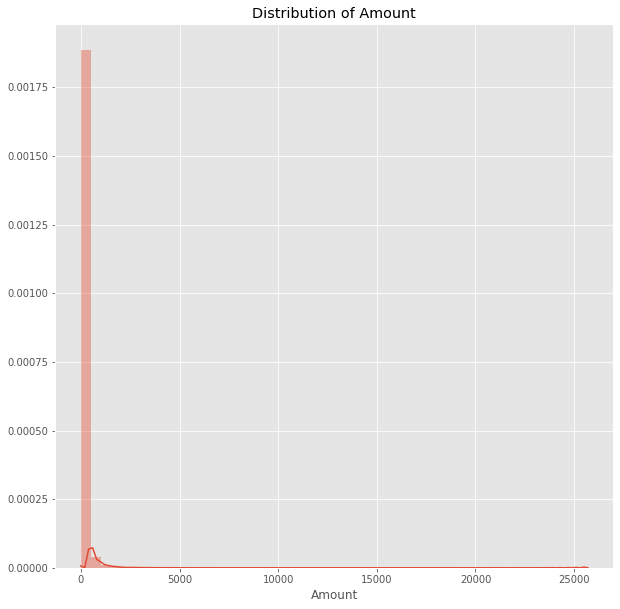

In [5]:
#Observing the nature of Amount feature using Seaborn
plt.figure(figsize=(10,10))
plt.title('Distribution of Amount')
sns.distplot(df.Amount)

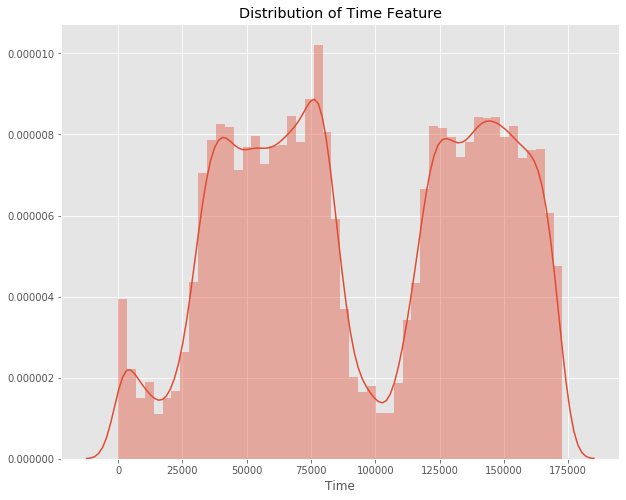

In [6]:
#Observing the nature of Time feature using Seaborn
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

In [7]:
#Note that as we are interested in detecting no. of fraudulent transactions so considering fraudulent transactions 
#as positive class(class=1) and non fraudulent transactions as negative class(class=0)

#Counting total no. of transactions
total_counts = df.Class.value_counts()
#Counting no. of fraudulent transactions
fraudulent = total_counts[1]
#Counting no. of non-fraudulent transactions
non_fraudulent = total_counts[0]
total_transactions = (non_fraudulent+fraudulent)
#Now calculating probabilities of fraudulent and non-fraudulent transactions
prob_of_fraudulent = (fraudulent/total_transactions)*100
prob_of_non_fraudulent = (non_fraudulent/total_transactions)*100
print('There are {} total transactions out of which {} are non-fraudulent transactions ({:.3f}%) and {} are fraudulent transactions ({:.3f}%).'.format(total_transactions,non_fraudulent, prob_of_non_fraudulent, fraudulent, prob_of_fraudulent))

There are 284807 total transactions out of which 284315 are non-fraudulent transactions (99.827%) and 492 are fraudulent transactions (0.173%).


Text(0, 0.5, 'Counts')

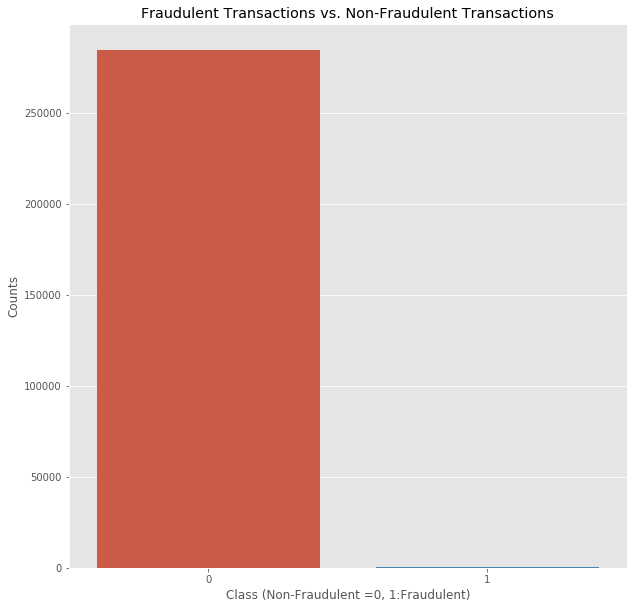

In [8]:
#Now plotting this dataset on bar plot using Seaborn
plt.figure(figsize=(10,10))
sns.barplot(x = total_counts.index, y = total_counts)
plt.title('Fraudulent Transactions vs. Non-Fraudulent Transactions')
plt.xlabel('Class (Non-Fraudulent =0, 1:Fraudulent)')
plt.ylabel('Counts')

In [9]:
#Scaling time and amount features for getting better results for Logistic Regression
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [10]:
#scaling Amount feature

amount_after_scaling = standard_scaler.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in amount_after_scaling.tolist() for item in sublist]
amount_after_scaling = pd.Series(flat_list2)

In [11]:
#scaling Time feature

time_after_scaling = standard_scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in time_after_scaling.tolist() for item in sublist]    # making a flat list out of a list of lists
time_after_scaling = pd.Series(flat_list1)

In [12]:
# Once the Amount and Time features are scaled, replacing old features with new scaled features and renaming them
df = pd.concat([df, amount_after_scaling.rename('amount_after_scaling'), time_after_scaling.rename('time_after_scaling')], axis=1)

#Dropping old features from the dataframe
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_after_scaling,time_after_scaling
215614,1.890439,-0.280671,-0.441258,1.394108,-0.229893,0.250374,-0.387064,0.194318,1.038257,0.165746,...,-1.202136,0.381915,-0.567515,-0.335803,-1.093829,0.047619,-0.044532,0,-0.282103,0.954622
89931,1.351245,-0.693846,-1.420984,-1.640007,1.500726,3.132939,-1.111295,0.804093,-0.872383,0.206825,...,-0.265936,-0.080244,0.920618,0.507194,-0.272569,0.022485,0.047595,0,-0.113744,-0.674314
209015,-1.088847,1.421704,-0.769461,-1.012973,0.835712,-0.280181,0.763119,0.126991,0.567009,0.595477,...,-0.747095,0.159428,-0.034437,-0.199547,0.137382,0.180499,-0.014353,0,-0.309051,0.896165
147546,0.168126,0.489497,0.250808,-0.310597,0.411499,-0.793711,0.665864,-0.016319,-0.231580,-0.217525,...,-0.366452,0.187562,-0.015618,-1.037484,0.127106,0.064851,0.090003,0,-0.338876,-0.129356
121611,1.316427,0.515686,-0.329453,0.977246,0.330852,-0.878406,0.564204,-0.341612,-0.296528,0.036019,...,-0.002361,-0.215354,-0.122100,0.936804,-0.264256,-0.006142,0.006164,0,-0.349671,-0.390811
77696,-0.665395,0.444290,-0.254962,-1.295019,2.412565,3.261043,-0.185310,0.722831,-0.359808,0.053825,...,-0.257205,-0.041142,1.074555,-0.435766,1.012256,-0.339899,0.178911,0,-0.343994,-0.792765
155815,-1.646946,0.945433,-1.609737,0.644473,1.284904,-2.248910,-0.181004,0.414566,0.836924,-2.386265,...,0.506518,-0.580397,-0.182079,-0.582494,-0.215061,0.057503,-0.171059,0,-0.349231,0.245349
70739,1.012273,0.133860,1.343010,2.950721,-0.703815,0.297737,-0.373089,0.227619,0.186269,0.386042,...,0.061969,0.027287,0.622912,0.407844,0.057720,0.038107,0.028481,0,-0.262073,-0.859518
239340,-1.190286,0.167455,1.650622,0.756867,0.922742,1.869883,-0.817444,0.639662,0.138808,0.211236,...,1.170304,-0.652401,-1.538773,0.172889,0.473727,0.317770,0.070803,0,-0.307251,1.163327
53947,1.169983,-0.924048,1.269738,-0.527585,-1.434776,0.309294,-1.204932,0.240437,-0.427545,0.518385,...,0.782097,-0.018944,0.300263,0.251777,-0.205221,0.066143,0.025183,0,-0.153325,-1.023159


Text(0, 0.5, 'Counts')

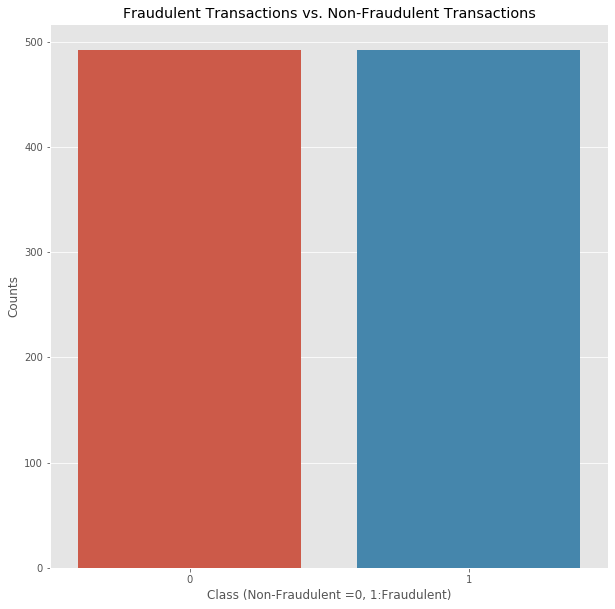

In [13]:
#Performing random undersampling as the dataset is highly unbalanced

#Taking all the fraudulent transactions
fraudulent = len(df[df['Class'] == 1])
fraudulent_index = df[df.Class == 1].index

#Taking random samples from non-fraudulent transactions so as to make 50/50 fraudulent-non fraudulent dataset
non_fraudulent_index = df[df.Class == 0].index
random_samples_from_non_fraudulent = np.random.choice(non_fraudulent_index,fraudulent, replace=False)

#Now merging these fraudulent and non fraudulent transactions to create our new balanced 50/50 dataset
counts_after_under_sampling = df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])].Class.value_counts()

plt.figure(figsize=(10,10))
sns.barplot(x=counts_after_under_sampling.index, y=counts_after_under_sampling)
plt.title('Fraudulent Transactions vs. Non-Fraudulent Transactions')
plt.xlabel('Class (Non-Fraudulent =0, 1:Fraudulent)')
plt.ylabel('Counts')

In [14]:
correlation_between_features = df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])].corr()
correlation_between_features = correlation_between_features[['Class']]

In [15]:
correlation_between_features[correlation_between_features.Class > 0.5]  # features with high positive correlation

,Class
V4,0.710817
V11,0.686590
Class,1.000000


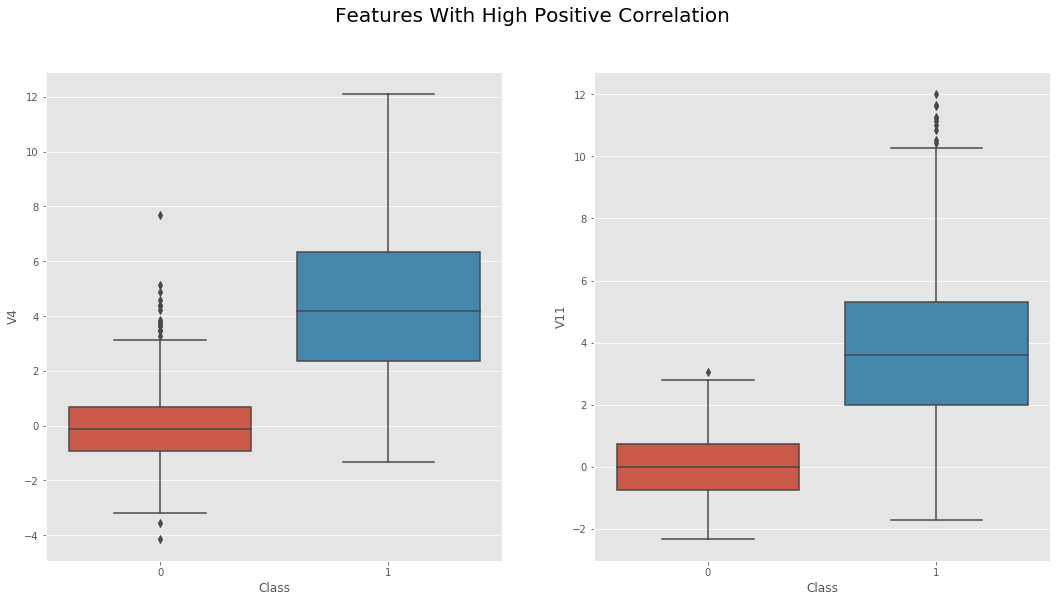

In [16]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[0])
sns.boxplot(x="Class", y="V11", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[1])

In [17]:
correlation_between_features[correlation_between_features.Class < -0.5] # features with high negative correlation

,Class
V3,-0.571050
V9,-0.539530
V10,-0.625016
V12,-0.684725
V14,-0.746990
V16,-0.593336
V17,-0.561740


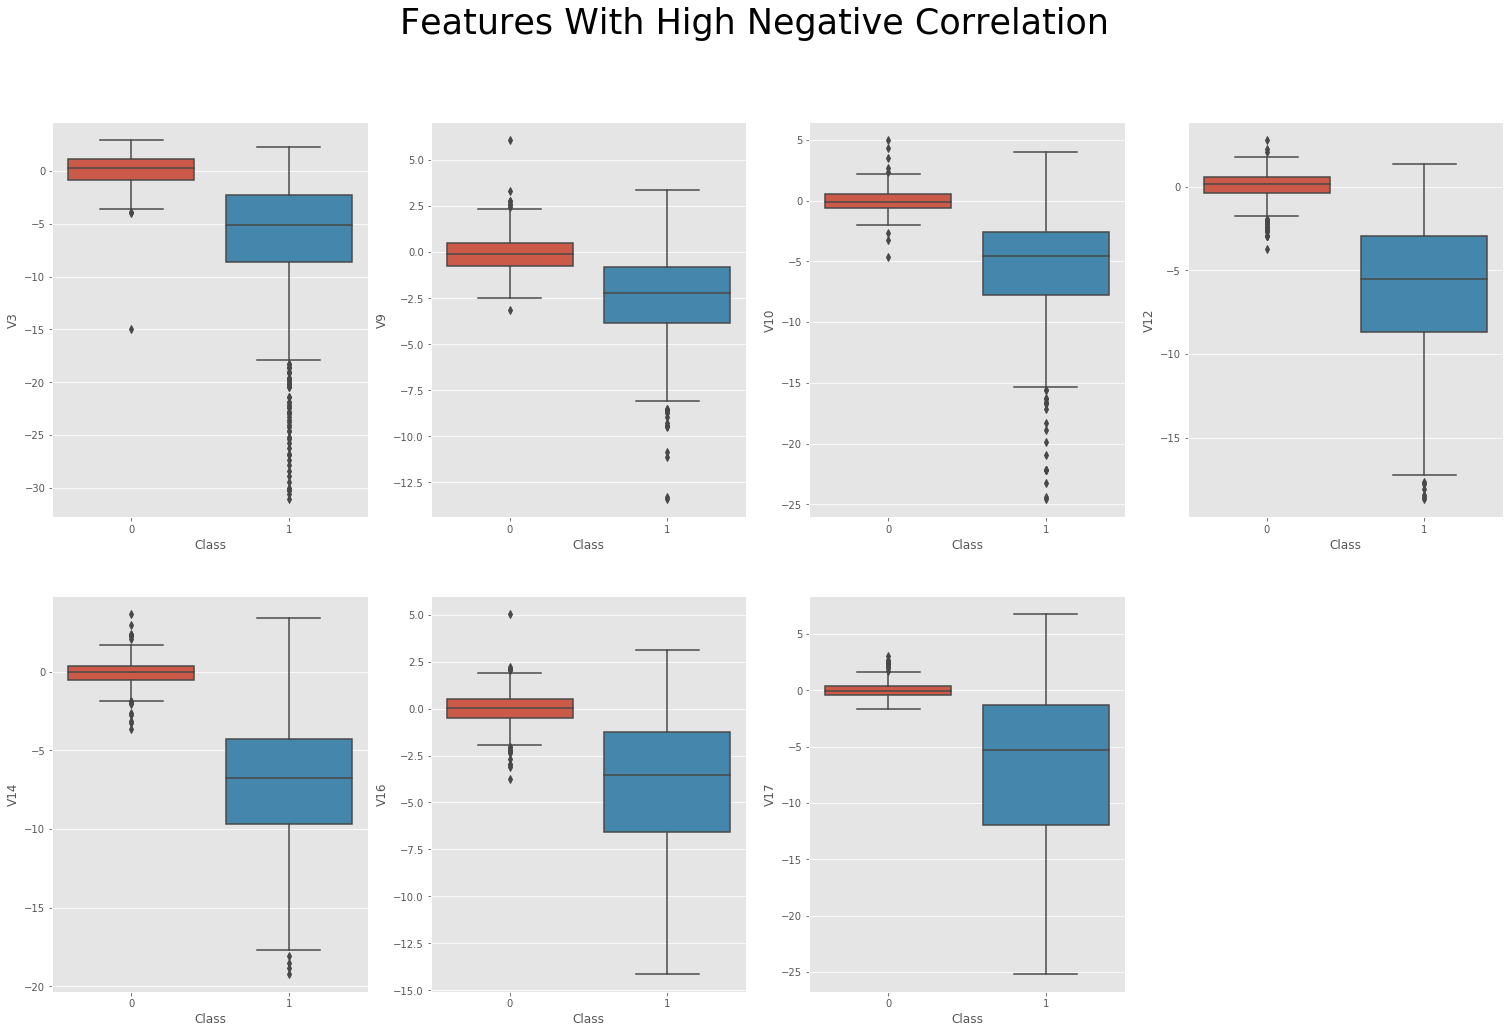

In [18]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])], ax=axes[1,2])
f.delaxes(axes[1,3])

In [19]:
# Detecting the outliers
after_sampling = df.loc[np.concatenate([fraudulent_index,random_samples_from_non_fraudulent])]

#Forming an Inter-Quartile range for outlier detection
Q3 = after_sampling.quantile(0.75)
Q1 = after_sampling.quantile(0.25)

IQR = Q3 - Q1

In [20]:
#Experimenting with different IQR ranges
df1 = after_sampling[~((after_sampling < (Q1 - 1.5*IQR)) |(after_sampling > (Q3 + 1.5*IQR))).any(axis=1)]
length_after_outlier_detection = len(df1)
length_before_outlier_detection = len(after_sampling)
print('The number of transactions are reduced from {} transactions to {} transactions.'
      .format(length_before_outlier_detection, length_after_outlier_detection))

The number of transactions are reduced from 984 transactions to 542 transactions.


In [21]:
df2 = after_sampling[~((after_sampling < (Q1 - 2.5*IQR)) |(after_sampling > (Q3 + 2.5*IQR))).any(axis=1)]
length_after_outlier_detection = len(df2)
length_before_outlier_detection = len(after_sampling)
print('The number of transactions are reduced from {} transactions to {} transactions.'
      .format(length_before_outlier_detection, length_after_outlier_detection))

The number of transactions are reduced from 984 transactions to 698 transactions.


In [22]:
df3 = after_sampling[~((after_sampling < (Q1 - 3.5*IQR)) |(after_sampling > (Q3 + 3.5*IQR))).any(axis=1)]
length_after_outlier_detection = len(df3)
length_before_outlier_detection = len(after_sampling)
print('The number of transactions are reduced from {} transactions to {} transactions.'
      .format(length_before_outlier_detection, length_after_outlier_detection))

The number of transactions are reduced from 984 transactions to 784 transactions.


In [23]:
#From the above experiments it can be seen that when range is 1.5 times the IQR then data is getting removed 
#instead of outliers and when range is 3.5 times the IQR then all of the outliers are not getting removed.
#So, finally setting as range as 2.5 times the IQR

#Removing the outliers that are outside 2.5 times the IQR and forming the training data
X = df2.drop('Class', axis=1)
y = df2['Class']

In [24]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [25]:
#Splitting the data into 80/20 train-test dataset
from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


In [26]:
#Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [27]:
# Parameter tuning for Random Forest

def best_param_selection_for_random_forest(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 80, 100, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 10, 12],
    'n_estimators': [100, 200, 300, 500]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_for_random_forest = best_param_selection_for_random_forest(X_under_train,y_under_train)

print('Best parameters for Random Forests are',best_params_for_random_forest)

Best parameters for Random Forests are {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 500}


In [28]:
# Paramter tuning for Support Vector Machine

def best_param_selection_for_svm(X, y):
    Cs = [0.001, 0.1, 0.5, 0.9, 10]
    gammas = [0.001, 0.1, 0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_for_svm = best_param_selection_for_svm(X_under_train,y_under_train)

print('Best parameters for SVM are',best_params_for_svm)

Best parameters for SVM are {'C': 10, 'gamma': 0.001}


In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


In [30]:
#Doing classification using Logistic Regression
model1 = LogisticRegression()
kfold = KFold(n_splits=10, random_state=42)
cv_results_roc1 = cross_val_score(model1, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
cv_results_f1 = cross_val_score(model1, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    
print('Logistic Regression')
print('F1 Score:',cv_results_f1.mean())
print('ROC-AUC:',cv_results_roc1.mean())
print('\n')

Logistic Regression
F1 Score: 0.942485779497687
ROC-AUC: 0.9696538203091982




In [31]:
#Doing classification using Random Forests
model2 = RandomForestClassifier(n_estimators=best_params_for_random_forest['n_estimators'],
        min_samples_split=best_params_for_random_forest['min_samples_split'],min_samples_leaf
     =best_params_for_random_forest['min_samples_leaf'],max_features=best_params_for_random_forest['max_features'],max_depth = best_params_for_random_forest['max_depth'],
                                    criterion='gini')
kfold = KFold(n_splits=10, random_state=42)
cv_results_roc2 = cross_val_score(model2, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
cv_results_f2 = cross_val_score(model2, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    
print('Random Forests')
print('F1 Score:',cv_results_f2.mean())
print('ROC-AUC:',cv_results_roc2.mean())
print('\n')

Random Forests
F1 Score: 0.937395583713706
ROC-AUC: 0.9644999767790015




In [32]:
#Doing classification using SVM
model3 = SVC(kernel='rbf',C = best_params_for_svm['C'],gamma=best_params_for_svm['gamma'])
kfold = KFold(n_splits=10, random_state=42)
cv_results_roc3 = cross_val_score(model3, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
cv_results_f3 = cross_val_score(model3, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')

print('Support Vector Machines')
print('F1 Score:',cv_results_f3.mean())
print('ROC-AUC:',cv_results_roc3.mean())
print('\n')

Support Vector Machines
F1 Score: 0.9416324921935555
ROC-AUC: 0.9643043538457835




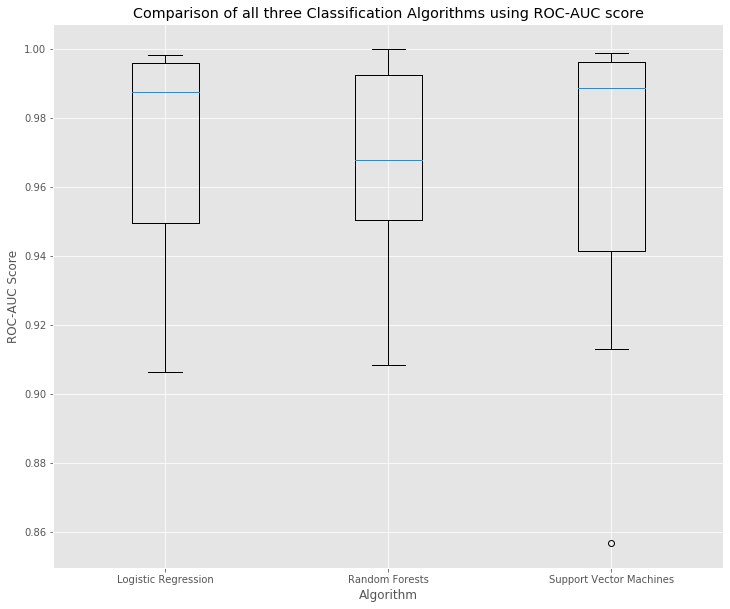

In [33]:
#Comparison of all the three algorithms for ROC-AUC score
algorithms = []
roc_results = []
roc_results.append(cv_results_roc1)
roc_results.append(cv_results_roc2)
roc_results.append(cv_results_roc3)

algorithms.append('Logistic Regression')
algorithms.append('Random Forests')
algorithms.append('Support Vector Machines')

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of all three Classification Algorithms using ROC-AUC score')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(roc_results)
ax = fig.add_subplot(111)
ax.set_xticklabels(algorithms)
plt.show()

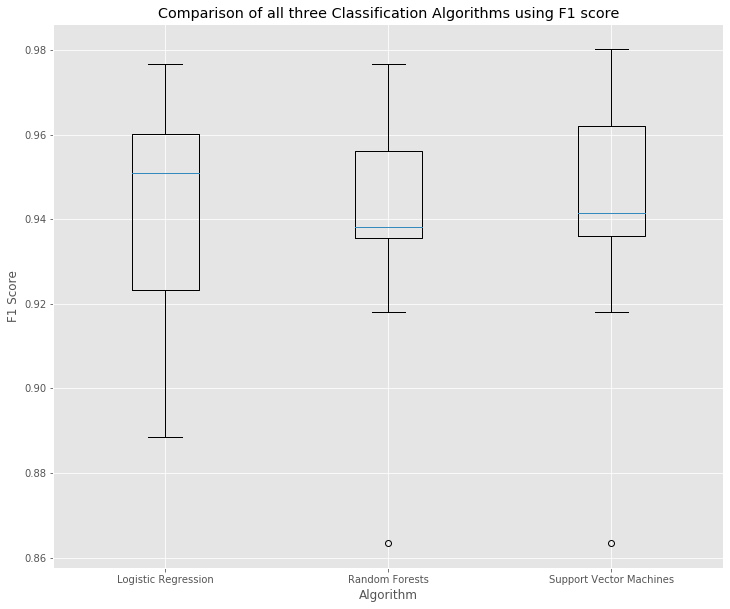

In [34]:
#Comparison of all the three algorithms for F1-score
f1_results = []
f1_results.append(cv_results_f1)
f1_results.append(cv_results_f2)
f1_results.append(cv_results_f3)

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of all three Classification Algorithms using F1 score')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.boxplot(f1_results)
ax = fig.add_subplot(111)
ax.set_xticklabels(algorithms)
plt.show()